# Experiment 2

This is the experiment for Figure 2b.

In [8]:
import numpy as np
from pathlib import Path
from ipywidgets import IntProgress, Label
from core.data import generate_data
from core.algorithm import test_confounder
from core.utils import draw_plots, save_fig
%matplotlib inline

Set the initial parameters.

In [9]:
num_experiments = 20  # Total number of experiments
num_tests = 30  # Number of tests per experiments
coef = 5.0  # Confounding factor
alpha = 0.05  # The significance level

num_envs = [50, 75, 100]
num_sams = [2, 10, 25, 50, 100]

Run the algorithm.

In [10]:
results = np.zeros((num_experiments, len(num_envs), len(num_sams)))
label_expr, progress_expr = Label(), IntProgress(min=0, max=num_experiments)
display(label_expr, progress_expr)
label_test, progress_test = Label(), IntProgress(min=0, max=num_tests)
display(label_test, progress_test)

for expr_idx in np.arange(num_experiments):
    label_expr.value = f"Doing experiment {expr_idx + 1} out of {num_experiments}."
    progress_expr.value = expr_idx + 1

    for test_idx in np.arange(num_tests):
        label_test.value = f"Doing test {test_idx + 1} out of {num_tests}."
        progress_test.value = test_idx + 1
        data = generate_data(num_envs[-1], num_sams[-1], coef)

        for num_env_idx, num_env in enumerate(num_envs):
            for num_obs_idx, num_obs in enumerate(num_sams):
                if test_confounder(data, num_env=num_env, num_obs=num_obs) < alpha:
                    results[expr_idx, num_env_idx, num_obs_idx] += 1


results /= num_tests

Label(value='')

IntProgress(value=0, max=20)

Label(value='')

IntProgress(value=0, max=30)

Draw the resulting plots.

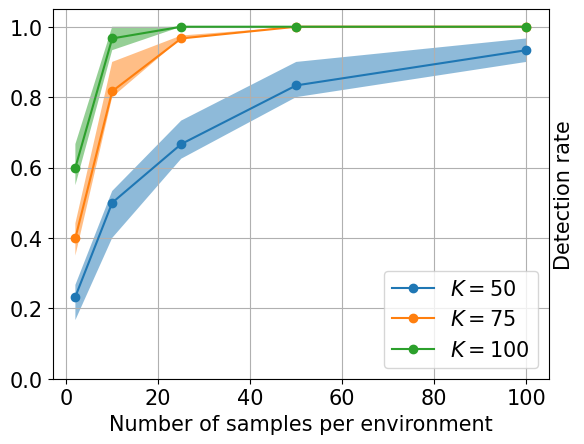

In [11]:
results = [np.quantile(results, i, axis=0, keepdims=False) for i in (0.25, 0.50, 0.75)]
labels = [rf'$K = {x}$' for x in num_envs]
fig = draw_plots(num_sams, *results, labels, xlabel=r'Number of samples per environment', ylabel=r'Detection rate', ylim=(0, 1.05))
save_fig(Path('results', 'expr2.pdf'), fig)
fig